In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [14]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,y_pred)
print("오차행렬 : \n",cm)

print("TN(true negative) =",cm[0,0])
print("TP(true positive) =",cm[1,1])
print("FN(false negative) =",cm[1,0])
print("FP(flase positive) =",cm[0,1])

오차행렬 : 
 [[337  20]
 [ 30 182]]
TN(true negative) = 337
TP(true positive) = 182
FN(false negative) = 30
FP(flase positive) = 20


* 정확도

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y,y_pred)

print("정확도 :",accuracy)

정확도 : 0.9121265377855887


* 정밀도

In [16]:
precision = precision_score(y,y_pred)

print("정밀도 :",precision)

정밀도 : 0.900990099009901


* 재현율

In [17]:
recall = recall_score(y,y_pred)

print("재현율 :",recall)

재현율 : 0.8584905660377359


* F1 score

In [18]:
from sklearn.metrics import f1_score
f1 = f1_score(y,y_pred)

print("F1스코어 :",f1)

F1스코어 : 0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [33]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba2 = pred_proba[:,1].reshape(-1,1)

y_pred2 = Binarizer(threshold=0.1).fit_transform(pred_proba2)

In [31]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

# 혼동행렬
cm2 = confusion_matrix(y,y_pred2)
print("오차행렬 : \n",cm2)

#정확도
accuracy2 = accuracy_score(y,y_pred2)
print("정확도 :",accuracy2)

#정밀도
precision2 = precision_score(y,y_pred2)
print("정밀도 :",precision2)

#재현율
recall2 = recall_score(y,y_pred2)
print("재현율 :",recall2)

#f1 score
f12 = f1_score(y,y_pred2)
print("F1스코어 :",f12)

오차행렬 : 
 [[267  90]
 [  6 206]]
정확도 : 0.8312829525483304
정밀도 : 0.6959459459459459
재현율 : 0.9716981132075472
F1스코어 : 0.8110236220472441


* ROC 곡선 시각화

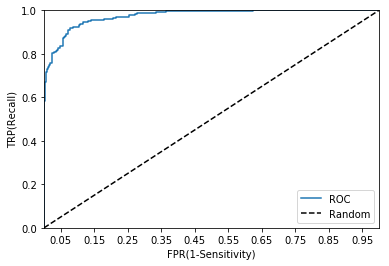

In [48]:
from sklearn.metrics import roc_curve 

import matplotlib.pyplot as plt
import numpy as np

def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TRP(Recall)')
    plt.legend()

roc_curve_plot(y,pred_proba2)

* ROC AUC 값

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y,y_pred)

print("ROC AUC값 :",roc_auc)

ROC AUC값 : 0.9012340785370753
